In [1]:
#Import all required packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import matplotlib.gridspec as gs

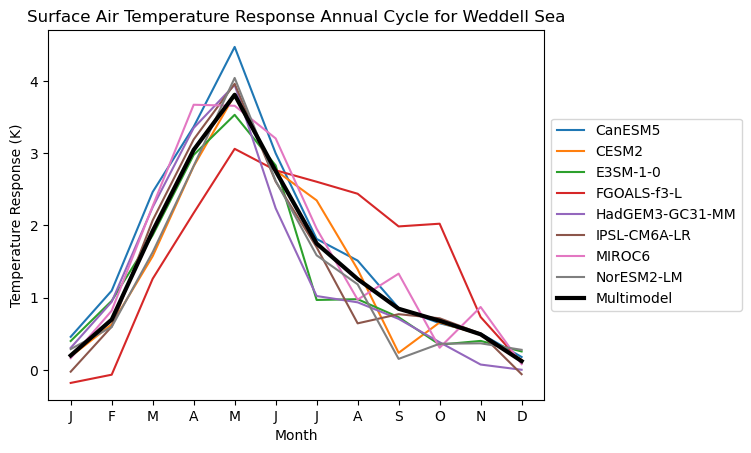

In [2]:
#Read all surface air temperature (TAS) files into script, changing them to start from January instead
canesmtasfut = xr.open_dataset('tas_pdSST-futAntSIC_CanESM5.nc').roll(time=5,roll_coords=True)
canesmtaspd = xr.open_dataset('tas_pdSST-pdSIC_CanESM5.nc').roll(time=5,roll_coords=True)
cesmtasfut = xr.open_dataset('tas_pdSST-futAntSIC_CESM2.nc').roll(time=5,roll_coords=True)
cesmtaspd = xr.open_dataset('tas_pdSST-pdSIC_CESM2.nc').roll(time=5,roll_coords=True)
e3smtasfut = xr.open_dataset('tas_pdSST-futAntSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
e3smtaspd = xr.open_dataset('tas_pdSST-pdSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
fgoalstasfut = xr.open_dataset('tas_pdSST-futAntSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
fgoalstaspd = xr.open_dataset('tas_pdSST-pdSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
hadgemtasfut = xr.open_dataset('tas_pdSST-futAntSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
hadgemtaspd = xr.open_dataset('tas_pdSST-pdSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
ipsltasfut = xr.open_dataset('tas_pdSST-futAntSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
ipsltaspd = xr.open_dataset('tas_pdSST-pdSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
miroctasfut = xr.open_dataset('tas_pdSST-futAntSIC_MIROC6.nc').roll(time=5,roll_coords=True)
miroctaspd = xr.open_dataset('tas_pdSST-pdSIC_MIROC6.nc').roll(time=5,roll_coords=True)
nortasfut = xr.open_dataset('tas_pdSST-futAntSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)
nortaspd = xr.open_dataset('tas_pdSST-pdSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)

#Calculate differences between future and present day data for each model
canesmtas = canesmtasfut - canesmtaspd
cesmtas = cesmtasfut - cesmtaspd
e3smtas = e3smtasfut - e3smtaspd
fgoalstas = fgoalstasfut - fgoalstaspd
hadgemtas = hadgemtasfut - hadgemtaspd
ipsltas = ipsltasfut - ipsltaspd
miroctas = miroctasfut - miroctaspd
nortas = nortasfut - nortaspd

#Redefine time variable as month numbers to work easier for time series
time = np.linspace(1,12,12) #New time variable
canesmtas['time'] = time
cesmtas['time'] = time
e3smtas['time'] = time
fgoalstas['time'] = time
hadgemtas['time'] = time
ipsltas['time'] = time
miroctas['time'] = time
nortas['time'] = time

####Plotting Weddell Sea TAS Annual Cycle
####
#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
#Can use Latitude co-ordinate from any model because they're all regridded onto the same latitude and longitudes
latprop = np.cos(np.deg2rad(canesmtas.LAT)).sel(LAT=slice(-80,-65)).mean(('LAT'))

#For each model, select an area of the globe (the Weddell Sea) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmtas_avg = (canesmtas*np.cos(np.deg2rad(canesmtas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
cesmtas_avg = (cesmtas*np.cos(np.deg2rad(cesmtas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
e3smtas_avg = (e3smtas*np.cos(np.deg2rad(e3smtas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
fgoalstas_avg = (fgoalstas*np.cos(np.deg2rad(fgoalstas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
hadgemtas_avg = (hadgemtas*np.cos(np.deg2rad(hadgemtas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
ipsltas_avg = (ipsltas*np.cos(np.deg2rad(ipsltas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
miroctas_avg = (miroctas*np.cos(np.deg2rad(miroctas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop
nortas_avg = (nortas*np.cos(np.deg2rad(nortas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop

#Define multimodel TAS and find average as with all models above
multitas = (canesmtas + cesmtas + e3smtas + fgoalstas + hadgemtas + ipsltas + miroctas + nortas)/8
multitas_avg = (multitas*np.cos(np.deg2rad(multitas.LAT))).sel(LAT=slice(-80,-65),LON=slice(300,340)).mean(('LON','LAT')) / latprop

#Plot Weddell Sea Annual Cycle for TAS for each model including a bolder line for the multimodel mean, all on the same axes
plt.plot(time, canesmtas_avg.tas, label='CanESM5')
plt.plot(time, cesmtas_avg.tas, label='CESM2')
plt.plot(time, e3smtas_avg.tas, label='E3SM-1-0')
plt.plot(time, fgoalstas_avg.tas, label='FGOALS-f3-L')
plt.plot(time, hadgemtas_avg.tas, label='HadGEM3-GC31-MM')
plt.plot(time, ipsltas_avg.tas, label='IPSL-CM6A-LR')
plt.plot(time, miroctas_avg.tas, label='MIROC6')
plt.plot(time, nortas_avg.tas, label='NorESM2-LM')
plt.plot(time, multitas_avg.tas, label='Multimodel', color='black', linewidth=3) #bolder line for the multimodel mean
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) #add legend on the outside of the plot (inside for poster)
plt.title('Surface Air Temperature Response Annual Cycle for Weddell Sea') #add title to plot
plt.xlabel('Month') #x-axis label
plt.ylabel('Temperature Response (K)') #y-axis label
plt.xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #x-axis labels to represent each month

#Save figure with high resolution
plt.savefig('AnnualCycleTASWeddell.png', dpi=400, bbox_inches = 'tight')

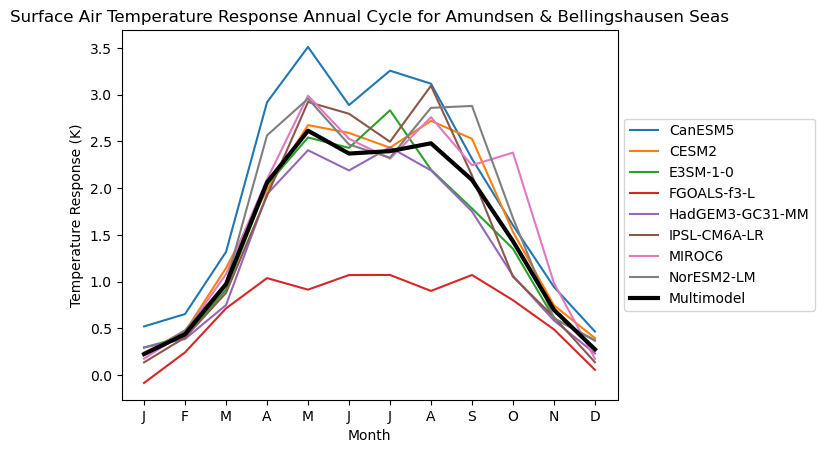

In [3]:
####Plotting Amundsen-Bellingshausen Sea Region TAS Annual Cycle
####
#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
latprop = np.cos(np.deg2rad(canesmtas.LAT)).sel(LAT=slice(-75,-65)).mean(('LAT'))

#For each model, select an area of the globe (the Amundsen/Bellingshausen Seas) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmtas_avg = (canesmtas*np.cos(np.deg2rad(canesmtas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
cesmtas_avg = (cesmtas*np.cos(np.deg2rad(cesmtas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
e3smtas_avg = (e3smtas*np.cos(np.deg2rad(e3smtas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
fgoalstas_avg = (fgoalstas*np.cos(np.deg2rad(fgoalstas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
hadgemtas_avg = (hadgemtas*np.cos(np.deg2rad(hadgemtas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
ipsltas_avg = (ipsltas*np.cos(np.deg2rad(ipsltas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
miroctas_avg = (miroctas*np.cos(np.deg2rad(miroctas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
nortas_avg = (nortas*np.cos(np.deg2rad(nortas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop

#Calculate and average the multimodel mean in the same way as the 8 models above
multitas = (canesmtas + cesmtas + e3smtas + fgoalstas + hadgemtas + ipsltas + miroctas + nortas)/8
multitas_avg = (multitas*np.cos(np.deg2rad(multitas.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop

#Plot Amundsen/Bellingshausen Sea TAS Annual Cycle for each model and the multimodel mean
plt.plot(time, canesmtas_avg.tas, label='CanESM5')
plt.plot(time, cesmtas_avg.tas, label='CESM2')
plt.plot(time, e3smtas_avg.tas, label='E3SM-1-0')
plt.plot(time, fgoalstas_avg.tas, label='FGOALS-f3-L')
plt.plot(time, hadgemtas_avg.tas, label='HadGEM3-GC31-MM')
plt.plot(time, ipsltas_avg.tas, label='IPSL-CM6A-LR')
plt.plot(time, miroctas_avg.tas, label='MIROC6')
plt.plot(time, nortas_avg.tas, label='NorESM2-LM')
plt.plot(time, multitas_avg.tas, label='Multimodel', color='black', linewidth=3) #bolder line for the multimodel mean
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) #Add legend to the outside of the plot
plt.title('Surface Air Temperature Response Annual Cycle for Amundsen & Bellingshausen Seas') #Add plot title
plt.xlabel('Month') #Add x-axis label
plt.ylabel('Temperature Response (K)') #Add y-axis label
plt.xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #Add month initials to x axis

#Save full figure in high resolution
plt.savefig('AnnualCycleTASAmundBell.png', dpi=400, bbox_inches='tight')

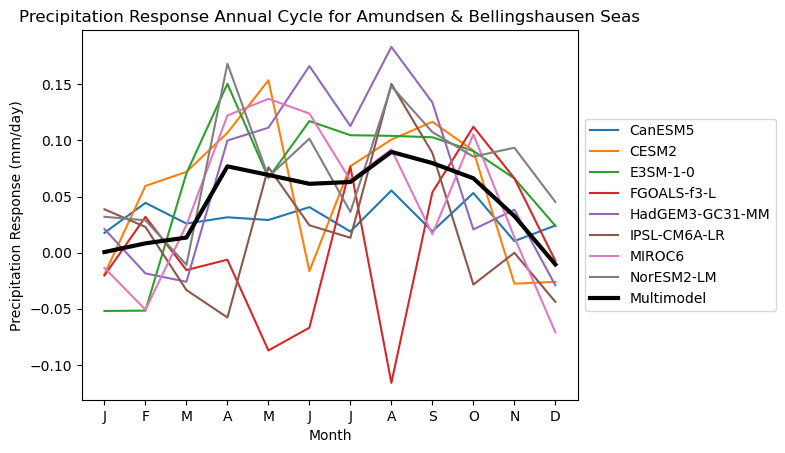

In [4]:
###Precipitation

#Load in all Precipitation data, reordering the data to start with January
canesmprfut = xr.open_dataset('pr_pdSST-futAntSIC_CanESM5.nc').roll(time=5,roll_coords=True)
canesmprpd = xr.open_dataset('pr_pdSST-pdSIC_CanESM5.nc').roll(time=5,roll_coords=True)
cesmprfut = xr.open_dataset('pr_pdSST-futAntSIC_CESM2.nc').roll(time=5,roll_coords=True)
cesmprpd = xr.open_dataset('pr_pdSST-pdSIC_CESM2.nc').roll(time=5,roll_coords=True)
e3smprfut = xr.open_dataset('pr_pdSST-futAntSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
e3smprpd = xr.open_dataset('pr_pdSST-pdSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
fgoalsprfut = xr.open_dataset('pr_pdSST-futAntSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
fgoalsprpd = xr.open_dataset('pr_pdSST-pdSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
hadgemprfut = xr.open_dataset('pr_pdSST-futAntSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
hadgemprpd = xr.open_dataset('pr_pdSST-pdSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
ipslprfut = xr.open_dataset('pr_pdSST-futAntSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
ipslprpd = xr.open_dataset('pr_pdSST-pdSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
mirocprfut = xr.open_dataset('pr_pdSST-futAntSIC_MIROC6.nc').roll(time=5,roll_coords=True)
mirocprpd = xr.open_dataset('pr_pdSST-pdSIC_MIROC6.nc').roll(time=5,roll_coords=True)
norprfut = xr.open_dataset('pr_pdSST-futAntSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)
norprpd = xr.open_dataset('pr_pdSST-pdSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)

#Calculate future to present day differences for each model
canesmpr = canesmprfut - canesmprpd
cesmpr = cesmprfut - cesmprpd
e3smpr = e3smprfut - e3smprpd
fgoalspr = fgoalsprfut - fgoalsprpd
hadgempr = hadgemprfut - hadgemprpd
ipslpr = ipslprfut - ipslprpd
mirocpr = mirocprfut - mirocprpd
norpr = norprfut - norprpd

#Convert from kgm^-2s^-1 to mm day^-1 by mulitplying by 86400
canesmpr = canesmpr*86400
cesmpr = cesmpr*86400
e3smpr = e3smpr*86400
fgoalspr = fgoalspr*86400
hadgempr = hadgempr*86400
ipslpr = ipslpr*86400
mirocpr = mirocpr*86400
norpr = norpr*86400

#Change time variable in each dataset to month number
canesmpr['time'] = time
cesmpr['time'] = time
e3smpr['time'] = time
fgoalspr['time'] = time
hadgempr['time'] = time
ipslpr['time'] = time
mirocpr['time'] = time
norpr['time'] = time

####Plotting Amundsen-Bellingshausen Sea Region Precipitation Annual Cycle

#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
latprop = np.cos(np.deg2rad(canesmpr.LAT)).sel(LAT=slice(-75,-65)).mean(('LAT'))

#For each model, select an area of the globe (the Amundsen/Bellingshausen Seas) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmpr_avg = (canesmpr*np.cos(np.deg2rad(canesmpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
cesmpr_avg = (cesmpr*np.cos(np.deg2rad(cesmpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
e3smpr_avg = (e3smpr*np.cos(np.deg2rad(e3smpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
fgoalspr_avg = (fgoalspr*np.cos(np.deg2rad(fgoalspr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
hadgempr_avg = (hadgempr*np.cos(np.deg2rad(hadgempr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
ipslpr_avg = (ipslpr*np.cos(np.deg2rad(ipslpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
mirocpr_avg = (mirocpr*np.cos(np.deg2rad(mirocpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop
norpr_avg = (norpr*np.cos(np.deg2rad(norpr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop

#Calculate multimodel mean and average in the same way as the 8 models
multipr = (canesmpr + cesmpr + e3smpr + fgoalspr + hadgempr + ipslpr + mirocpr + norpr)/8
multipr_avg = (multipr*np.cos(np.deg2rad(multipr.LAT))).sel(LAT=slice(-75,-65),LON=slice(200,280)).mean(('LON','LAT')) / latprop

#Plot Amundsen-Bellingshausen Sea Region Precipitation Annual Cycle for all 8 models and the multimodel mean
plt.plot(time, canesmpr_avg.pr, label='CanESM5')
plt.plot(time, cesmpr_avg.pr, label='CESM2')
plt.plot(time, e3smpr_avg.pr, label='E3SM-1-0')
plt.plot(time, fgoalspr_avg.pr, label='FGOALS-f3-L')
plt.plot(time, hadgempr_avg.pr, label='HadGEM3-GC31-MM')
plt.plot(time, ipslpr_avg.pr, label='IPSL-CM6A-LR')
plt.plot(time, mirocpr_avg.pr, label='MIROC6')
plt.plot(time, norpr_avg.pr, label='NorESM2-LM')
plt.plot(time, multipr_avg.pr, label='Multimodel', color='black', linewidth=3) #bolder line for the multimodel mean
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) #Add legend on the outside of the plot
plt.title('Precipitation Response Annual Cycle for Amundsen & Bellingshausen Seas') #Add plot title
plt.xlabel('Month') #Add x-axis label
plt.ylabel('Precipitation Response (mm/day)') #Add y-axis label
plt.xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #Add month initials to x-axis

#Save full figure with high resolution
plt.savefig('AnnualCyclePrAmundBell.png', dpi=400, bbox_inches='tight')

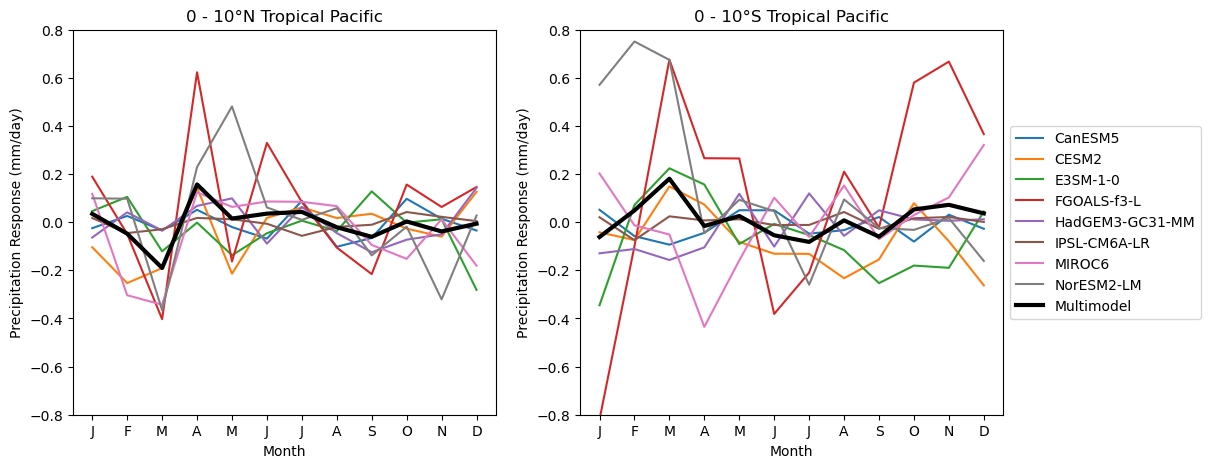

In [5]:
###Precipitation for Tropical Pacific Region
#Set up figure for 2 subplots
fig = plt.figure(figsize = (12,5))
grid = gs.GridSpec(1,2, wspace = 0.2) #2 subplots with increased white space

#First figure for region above equator
ax = fig.add_subplot(grid[0,0])

#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
latprop = np.cos(np.deg2rad(canesmpr.LAT)).sel(LAT=slice(0,10)).mean(('LAT'))

#For each model, select an area of the globe (the tropical Pacific above the Equator) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmpr_avg = (canesmpr*np.cos(np.deg2rad(canesmpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
cesmpr_avg = (cesmpr*np.cos(np.deg2rad(cesmpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
e3smpr_avg = (e3smpr*np.cos(np.deg2rad(e3smpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
fgoalspr_avg = (fgoalspr*np.cos(np.deg2rad(fgoalspr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
hadgempr_avg = (hadgempr*np.cos(np.deg2rad(hadgempr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
ipslpr_avg = (ipslpr*np.cos(np.deg2rad(ipslpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
mirocpr_avg = (mirocpr*np.cos(np.deg2rad(mirocpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop
norpr_avg = (norpr*np.cos(np.deg2rad(norpr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop

#Calculate multimodel mean and average in same way to above 8 models
multipr = (canesmpr + cesmpr + e3smpr + fgoalspr + hadgempr + ipslpr + mirocpr + norpr)/8
multipr_avg = (multipr*np.cos(np.deg2rad(multipr.LAT))).sel(LAT=slice(0,10),LON=slice(160,200)).mean(('LON','LAT')) / latprop

#Plot Precipitation Annual Cycle for Pacific Region above Equator for each model
ax.plot(time, canesmpr_avg.pr, label='CanESM5')
ax.plot(time, cesmpr_avg.pr, label='CESM2')
ax.plot(time, e3smpr_avg.pr, label='E3SM-1-0')
ax.plot(time, fgoalspr_avg.pr, label='FGOALS-f3-L')
ax.plot(time, hadgempr_avg.pr, label='HadGEM3-GC31-MM')
ax.plot(time, ipslpr_avg.pr, label='IPSL-CM6A-LR') 
ax.plot(time, mirocpr_avg.pr, label='MIROC6')
ax.plot(time, norpr_avg.pr, label='NorESM2-LM')
ax.plot(time, multipr_avg.pr, label='Multimodel', color='black', linewidth=3) #bolder black line for the multimodel mean
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) no legend for left subplot
ax.set_title('0 - 10°N Tropical Pacific') #Subplot title
ax.set_xlabel('Month') #x-axis label
ax.set_ylabel('Precipitation Response (mm/day)') #y-axis label
ax.set_ylim([-0.8,0.8]) #set y limit equal to other subplot
ax.set_xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #Add labels along x-axis to represent months

#Second figure for region below Equator
ax = fig.add_subplot(grid[0,1])

#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
latprop = np.cos(np.deg2rad(canesmpr.LAT)).sel(LAT=slice(-10,0)).mean(('LAT'))

#For each model, select an area of the globe (the tropical Pacific just below the Equator) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmpr_avg = (canesmpr*np.cos(np.deg2rad(canesmpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
cesmpr_avg = (cesmpr*np.cos(np.deg2rad(cesmpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
e3smpr_avg = (e3smpr*np.cos(np.deg2rad(e3smpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
fgoalspr_avg = (fgoalspr*np.cos(np.deg2rad(fgoalspr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
hadgempr_avg = (hadgempr*np.cos(np.deg2rad(hadgempr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
ipslpr_avg = (ipslpr*np.cos(np.deg2rad(ipslpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
mirocpr_avg = (mirocpr*np.cos(np.deg2rad(mirocpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop
norpr_avg = (norpr*np.cos(np.deg2rad(norpr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop

#Calculate multimodel mean and average out for the area, same as 8 models above
multipr = (canesmpr + cesmpr + e3smpr + fgoalspr + hadgempr + ipslpr + mirocpr + norpr)/8
multipr_avg = (multipr*np.cos(np.deg2rad(multipr.LAT))).sel(LAT=slice(-10,0),LON=slice(160,200)).mean(('LON','LAT')) / latprop

#Plot Precipitation Annual Cycle for Pacific Region below equator
ax.plot(time, canesmpr_avg.pr, label='CanESM5')
ax.plot(time, cesmpr_avg.pr, label='CESM2')
ax.plot(time, e3smpr_avg.pr, label='E3SM-1-0')
ax.plot(time, fgoalspr_avg.pr, label='FGOALS-f3-L')
ax.plot(time, hadgempr_avg.pr, label='HadGEM3-GC31-MM')
ax.plot(time, ipslpr_avg.pr, label='IPSL-CM6A-LR')
ax.plot(time, mirocpr_avg.pr, label='MIROC6')
ax.plot(time, norpr_avg.pr, label='NorESM2-LM')
ax.plot(time, multipr_avg.pr, label='Multimodel', color='black', linewidth=3) #bolder black line for multimodel mean
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) #Add legend to side of subplots
ax.set_title('0 - 10°S Tropical Pacific') #Set subplot title
ax.set_xlabel('Month') #x-axis label
ax.set_ylabel('Precipitation Response (mm/day)') #y-axis label
ax.set_ylim([-0.8,0.8]) #Same y limit for both subplots
ax.set_xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #x-axis labels across plot

#Save full figure with high resolution
plt.savefig('AnnualCyclePrTropicalPacific.png', dpi=400, bbox_inches='tight')

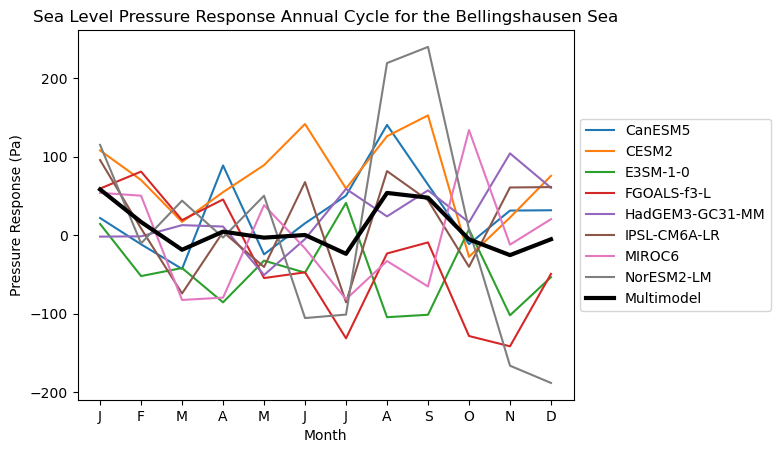

In [6]:
### Sea Level Pressure in Bellingshausen Sea

#Load all SLP datasets, reordering all to start with January
canesmpslfut = xr.open_dataset('psl_pdSST-futAntSIC_CanESM5.nc').roll(time=5,roll_coords=True)
canesmpslpd = xr.open_dataset('psl_pdSST-pdSIC_CanESM5.nc').roll(time=5,roll_coords=True)
cesmpslfut = xr.open_dataset('psl_pdSST-futAntSIC_CESM2.nc').roll(time=5,roll_coords=True)
cesmpslpd = xr.open_dataset('psl_pdSST-pdSIC_CESM2.nc').roll(time=5,roll_coords=True)
e3smpslfut = xr.open_dataset('psl_pdSST-futAntSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
e3smpslpd = xr.open_dataset('psl_pdSST-pdSIC_E3SM-1-0.nc').roll(time=5,roll_coords=True)
fgoalspslfut = xr.open_dataset('psl_pdSST-futAntSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
fgoalspslpd = xr.open_dataset('psl_pdSST-pdSIC_FGOALS-f3-L.nc').roll(time=5,roll_coords=True)
hadgempslfut = xr.open_dataset('psl_pdSST-futAntSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
hadgempslpd = xr.open_dataset('psl_pdSST-pdSIC_HadGEM3-GC31-MM.nc').roll(time=5,roll_coords=True)
ipslpslfut = xr.open_dataset('psl_pdSST-futAntSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
ipslpslpd = xr.open_dataset('psl_pdSST-pdSIC_IPSL-CM6A-LR.nc').roll(time=5,roll_coords=True)
mirocpslfut = xr.open_dataset('psl_pdSST-futAntSIC_MIROC6.nc').roll(time=5,roll_coords=True)
mirocpslpd = xr.open_dataset('psl_pdSST-pdSIC_MIROC6.nc').roll(time=5,roll_coords=True)
norpslfut = xr.open_dataset('psl_pdSST-futAntSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)
norpslpd = xr.open_dataset('psl_pdSST-pdSIC_NorESM2-LM.nc').roll(time=5,roll_coords=True)

#Calculate difference between future and present day data for each model
canesmpsl = canesmpslfut - canesmpslpd
cesmpsl = cesmpslfut - cesmpslpd
e3smpsl = e3smpslfut - e3smpslpd
fgoalspsl = fgoalspslfut - fgoalspslpd
hadgempsl = hadgempslfut - hadgempslpd
ipslpsl = ipslpslfut - ipslpslpd
mirocpsl = mirocpslfut - mirocpslpd
norpsl = norpslfut - norpslpd

#Redefine time co-ordinate in same way as other two variables
canesmpsl['time'] = time
cesmpsl['time'] = time
e3smpsl['time'] = time
fgoalspsl['time'] = time
hadgempsl['time'] = time
ipslpsl['time'] = time
mirocpsl['time'] = time
norpsl['time'] = time

#Define numbers to divide by in order to average proportionally, taking into account the curvature of the Earth
latprop = np.cos(np.deg2rad(canesmpsl.LAT)).sel(LAT=slice(-74,-67)).mean(('LAT'))

#For each model, select an area of the globe (the Bellingshausen Sea) and average over it for each month of the year,
#taking into account averaging required to deal with the curvature of the planet
canesmpsl_avg = (canesmpsl*np.cos(np.deg2rad(canesmpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
cesmpsl_avg = (cesmpsl*np.cos(np.deg2rad(cesmpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
e3smpsl_avg = (e3smpsl*np.cos(np.deg2rad(e3smpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
fgoalspsl_avg = (fgoalspsl*np.cos(np.deg2rad(fgoalspsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
hadgempsl_avg = (hadgempsl*np.cos(np.deg2rad(hadgempsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
ipslpsl_avg = (ipslpsl*np.cos(np.deg2rad(ipslpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
mirocpsl_avg = (mirocpsl*np.cos(np.deg2rad(mirocpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop
norpsl_avg = (norpsl*np.cos(np.deg2rad(norpsl.LAT))).sel(LAT=slice(-74,-67),LON=slice(260,290)).mean(('LON','LAT')) / latprop

#Calculate the multimodel mean and average over the Bellingshausen Sea in same way as 8 models above
multipsl = (canesmpsl + cesmpsl + e3smpsl + fgoalspsl + hadgempsl + ipslpsl + mirocpsl + norpsl)/8
multipsl_avg = (multipsl*np.cos(np.deg2rad(multipsl.LAT))).sel(LAT=slice(-74,-68),LON=slice(260,290)).mean(('LON','LAT')) / latprop

#Plot Bellingshausen Sea Annual Cycle for SLP
plt.plot(time, canesmpsl_avg.psl, label='CanESM5')
plt.plot(time, cesmpsl_avg.psl, label='CESM2')
plt.plot(time, e3smpsl_avg.psl, label='E3SM-1-0')
plt.plot(time, fgoalspsl_avg.psl, label='FGOALS-f3-L')
plt.plot(time, hadgempsl_avg.psl, label='HadGEM3-GC31-MM')
plt.plot(time, ipslpsl_avg.psl, label='IPSL-CM6A-LR')
plt.plot(time, mirocpsl_avg.psl, label='MIROC6')
plt.plot(time, norpsl_avg.psl, label='NorESM2-LM')
plt.plot(time, multipsl_avg.psl, label='Multimodel', color='black', linewidth=3) #Bolder black line for multimodel mean
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True) #Add legend outside the plot on the right hand side
plt.title('Sea Level Pressure Response Annual Cycle for the Bellingshausen Sea') #Add plot title
plt.xlabel('Month') #Add x-axis label
plt.ylabel('Pressure Response (Pa)') #Add y-axis label
plt.xticks(time, ['J','F','M','A','M','J','J','A','S','O','N','D']) #Add x-axis labels to represent each month

#Save full figure in high resolution
plt.savefig('AnnualCyclePsl.png', dpi=400, bbox_inches='tight')